### This study is concerned by how much is the percentage of the students who complete a free online course.
### The course in this study is **Programming Methodology** *(CS106A)* which is offered by Stanford.
#### All data is collected from Stanford youtube channel.
#### The study is only for educational purposes.

### Importing the libraries

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from selenium import webdriver
from os import path
from time import sleep


### We will use selenium in to scrape youtube, because using beautifulsoup directly gives no data 

In [2]:
driver = webdriver.Edge(executable_path = "the path to selenium driver")

### we will get the links of all videos from the playlist page
#### you can add any playlist link

In [3]:
playlist_link = "https://www.youtube.com/playlist?list=PL84A56BC7F4A1F852"

In [4]:
driver.get(playlist_link)
html = driver.page_source
soup = BeautifulSoup(html)
links = soup.find_all("a", {"id": "video-title"})


In [5]:
for i in range(len(links)):
    links[i] = "https://www.youtube.com" + str(links[i]).split("\"")[5]

In [6]:
links

['https://www.youtube.com/watch?v=KkMDCCdjyW8&amp;list=PL84A56BC7F4A1F852&amp;index=1',
 'https://www.youtube.com/watch?v=0LoKDDRlfZc&amp;list=PL84A56BC7F4A1F852&amp;index=2',
 'https://www.youtube.com/watch?v=C5HeRliZ0Ns&amp;list=PL84A56BC7F4A1F852&amp;index=3',
 'https://www.youtube.com/watch?v=nWheM30THaY&amp;list=PL84A56BC7F4A1F852&amp;index=4',
 'https://www.youtube.com/watch?v=NPzPnycCFuE&amp;list=PL84A56BC7F4A1F852&amp;index=5',
 'https://www.youtube.com/watch?v=GPWah4wbwYs&amp;list=PL84A56BC7F4A1F852&amp;index=6',
 'https://www.youtube.com/watch?v=3oM9yT9kBBc&amp;list=PL84A56BC7F4A1F852&amp;index=7',
 'https://www.youtube.com/watch?v=W2ysz_6AyJE&amp;list=PL84A56BC7F4A1F852&amp;index=8',
 'https://www.youtube.com/watch?v=iYtri45lhtc&amp;list=PL84A56BC7F4A1F852&amp;index=9',
 'https://www.youtube.com/watch?v=YpZCKVG4s5k&amp;list=PL84A56BC7F4A1F852&amp;index=10',
 'https://www.youtube.com/watch?v=Iua9Klr0lfo&amp;list=PL84A56BC7F4A1F852&amp;index=11',
 'https://www.youtube.com/watc

### now we will get the views count from each video.
#### because some videos return errors, we will check them later separately.

In [7]:
views = {}

In [8]:
for num, link in enumerate(links):
    while True:
        sleep(5)
        vid = driver.get(link)
        vid = driver.page_source
        soup = BeautifulSoup(vid)
        view_count = soup.find(class_ = "view-count")
        if view_count == None:
            continue
        print(view_count)
        views[num] = (int(view_count.contents[0].split(" ")[0].replace(",","")))
        break

<span class="view-count style-scope ytd-video-view-count-renderer">2,269,545 views</span>
<span class="view-count style-scope ytd-video-view-count-renderer">988,727 views</span>
<span class="view-count style-scope ytd-video-view-count-renderer">508,914 views</span>
<span class="view-count style-scope ytd-video-view-count-renderer">475,067 views</span>
<span class="view-count style-scope ytd-video-view-count-renderer">356,416 views</span>
<span class="view-count style-scope ytd-video-view-count-renderer">263,520 views</span>
<span class="view-count style-scope ytd-video-view-count-renderer">255,551 views</span>
<span class="view-count style-scope ytd-video-view-count-renderer">208,858 views</span>
<span class="view-count style-scope ytd-video-view-count-renderer">210,605 views</span>
<span class="view-count style-scope ytd-video-view-count-renderer">175,966 views</span>
<span class="view-count style-scope ytd-video-view-count-renderer">148,774 views</span>
<span class="view-count style-

### To get the number of persons who completed the course, we will take the number of views in lecture 27 (before the last)
### To get the number of persons who started the course, we will take the number of views in lecture 2
#### This is because many people check the first and the last lecture without real intention to watch

In [9]:
views = list(views.values())

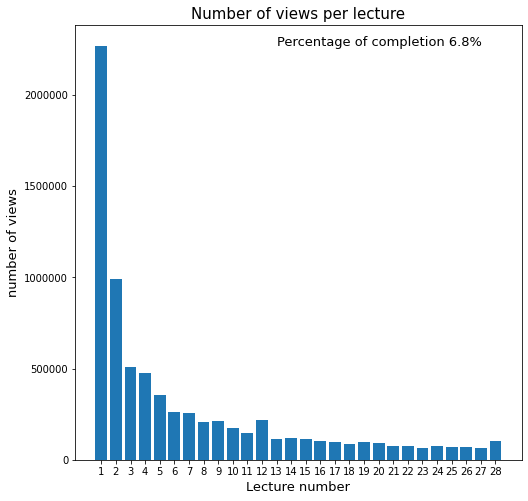

In [44]:
plt.figure(figsize=(8,8))
plt.bar(x = range(1, len(views) + 1), height = views);
plt.ticklabel_format(style = "plain");
plt.xticks(range(1,len(views) + 1));
plt.title("Number of views per lecture", fontsize = 15);
plt.xlabel("Lecture number", fontsize = 13);
plt.ylabel("number of views", fontsize = 13);
plt.text(x = len(views) - 15, y = max(views), s = (f"Percentage of completion {round(views[len(views) - 2] / views[1] * 100,2)}%"), fontsize = 13);